### Постановка задачи
##### Расчётная область:
прямоугольник, в верхней части которого справедливы акустические уравнения, в нижней - уравнения изотропной теории упругости. Системы уравнений, описывающие обе части, гиперболические. Вертикальные размеры верхней и нижней частей: 250 м и 750 м; горизонтальный размер: 2000 м. В верхней части на расстоянии 50 м от линии контакта и горизонтально посередине помещён источник. Его функция от времени задана.
##### Параметры
акустической среды: $ c = 1500 \ м/с, \ \rho_a = 1000 \ кг/м^3 $.  
упругой среды: $ c_p = 3000 \ м/с, \ c_s = 1500 \ м/с, \ \rho_e = 1000 \ кг/м^3 $.
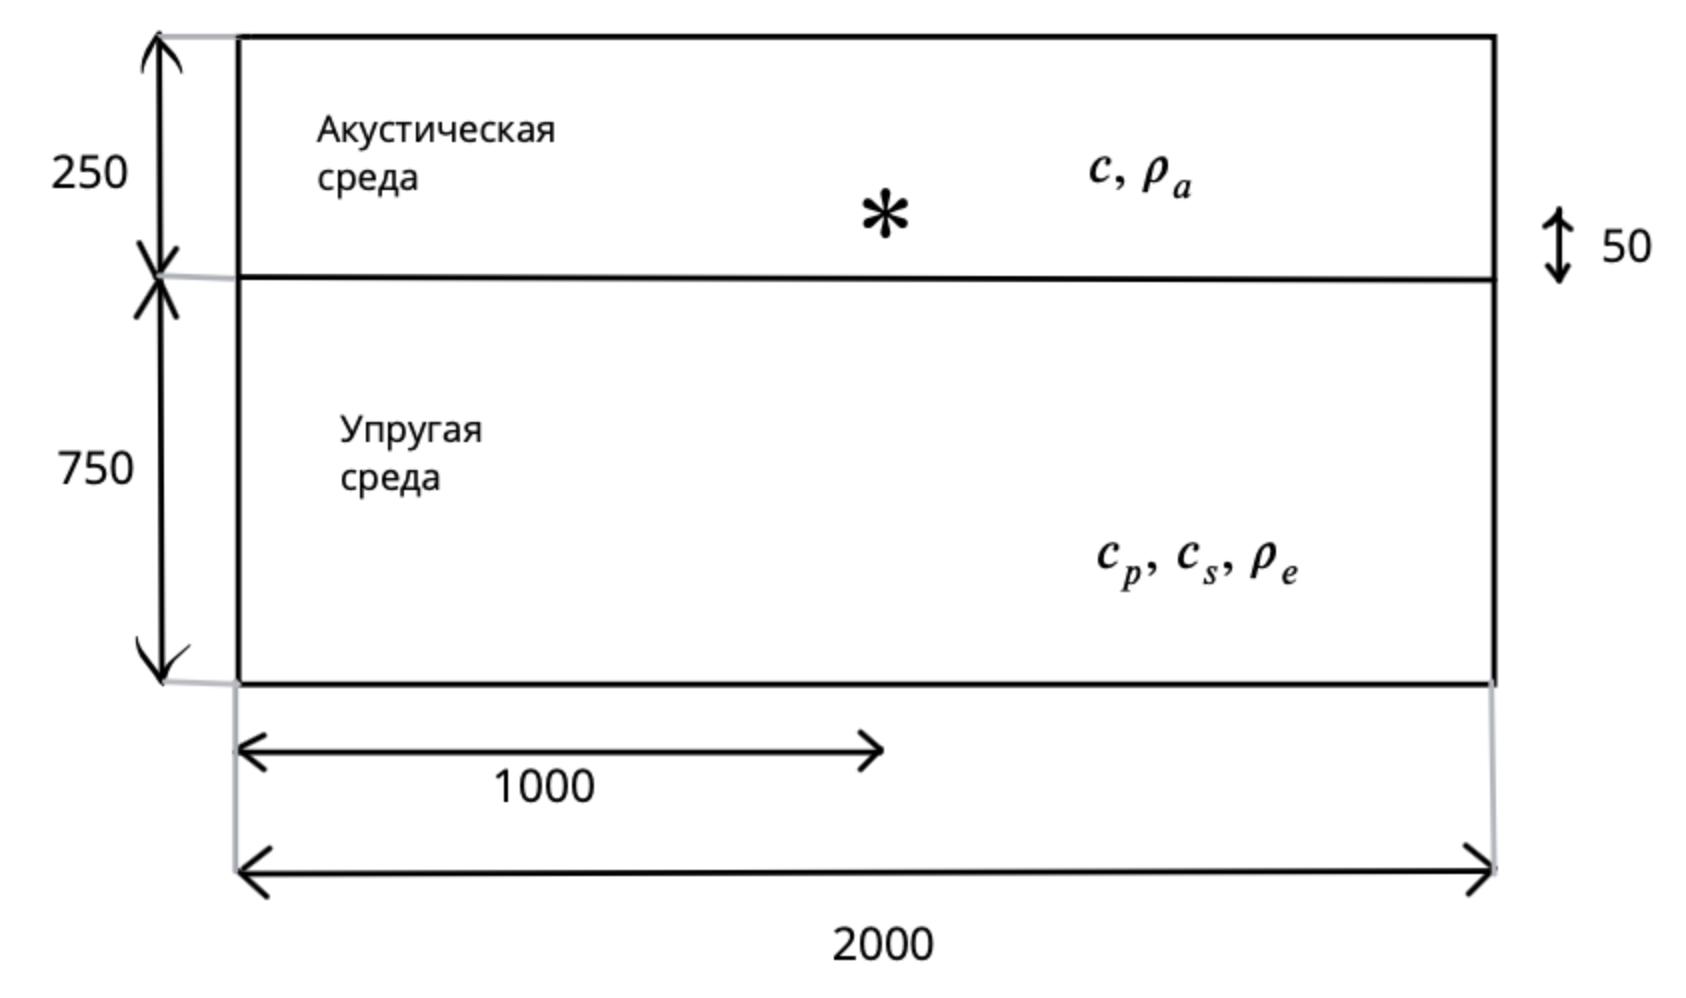
##### Задача:
найти распространение возмущения, создаваемого источником.

In [13]:
from sympy import Matrix, symbols, init_printing, diag, together, simplify, sqrt, solve
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
init_printing()

#### Акустика:
$$\frac{\partial v_x}{\partial t} + \frac{1}{\rho_a} \frac{\partial p}{\partial x} = 0$$
$$\frac{\partial v_y}{\partial t} + \frac{1}{\rho_a} \frac{\partial p}{\partial y} = 0$$
$$ \frac{\partial p}{\partial t} + \rho_a c^2 \frac{\partial v_x}{\partial x} + \rho_a c^2 \frac{\partial v_y}{\partial y} = 0$$

$$\frac{\partial \overrightarrow q_a}{\partial t} + A_x^a \frac{\partial \overrightarrow q_a}{\partial x} + A_y^a \frac{\partial \overrightarrow q_a}{\partial y} = 0, \overrightarrow q_a = \left(v_x, v_y, p \right)$$

In [14]:
rho_a, c, v_x, v_y, p, w1, w2, w3 = symbols('rho_a c v_x v_y p w_1 w_2 w_3')
A_x_a = Matrix([[0, 0, 1 / rho_a], [0, 0, 0], [(rho_a * c ** 2), 0, 0]])
print('A_x_a:')
display(A_x_a)
print('Eigenvectors:')
display(A_x_a.eigenvects())

A_y_a = Matrix([[0, 0, 0], [0, 0, 1 / rho_a], [0, (rho_a * c ** 2), 0]])
print('A_y_a:')
display(A_y_a)
print('Eigenvectors:')
display(A_y_a.eigenvects())

print('[Matrix of eigenvalues] Lambda_x_a = Lambda_y_a')
Lambda_x_a, Lambda_y_a = diag(0, -c, c), diag(0, -c, c)
display(Lambda_x_a)

Omega_x_a_inv = Matrix([[0, -1 / (c * rho_a), 1 / (c * rho_a)], [1, 0, 0], [0, 1, 1]])
Omega_x_a = Omega_x_a_inv.inv()
print('Omega_x_a:')
display(Omega_x_a)
print('Omega_x_a_inv:')
display(Omega_x_a_inv)

Omega_y_a_inv = Matrix([[1, 0, 0], [0, -1 / (c * rho_a), 1 / (c * rho_a)], [0, 1, 1]])
Omega_y_a = Omega_y_a_inv.inv()
print('Omega_y_a:')
display(Omega_y_a)
print('Omega_y_a_inv:')
display(Omega_y_a_inv)

q = Matrix([v_x, v_y, p])
print('Omega_x_a * q')
display(simplify(together(Omega_x_a * q)))
print('Omega_y_a * q')
display(simplify(together(Omega_y_a * q)))

w = Matrix([w1, w2, w3])
print('Omega_x_a_inv * w')
display(simplify(together(Omega_x_a_inv * w)))
print('Omega_y_a_inv * w')
display(simplify(together(Omega_y_a_inv * w)))

A_x_a:


⎡          1 ⎤
⎢  0    0  ──⎥
⎢          ρₐ⎥
⎢            ⎥
⎢  0    0  0 ⎥
⎢            ⎥
⎢ 2          ⎥
⎣c ⋅ρₐ  0  0 ⎦

Eigenvectors:


⎡               ⎛       ⎡⎡-1  ⎤⎤⎞  ⎛      ⎡⎡ 1  ⎤⎤⎞⎤
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜       ⎢⎢────⎥⎥⎟  ⎜      ⎢⎢────⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢c⋅ρₐ⎥⎥⎟  ⎜      ⎢⎢c⋅ρₐ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢1⎥⎥⎟, ⎜-c, 1, ⎢⎢    ⎥⎥⎟, ⎜c, 1, ⎢⎢    ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ 0  ⎥⎥⎟  ⎜      ⎢⎢ 0  ⎥⎥⎟⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟⎥
⎣               ⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣ 1  ⎦⎦⎠⎦

A_y_a:


⎡0    0    0 ⎤
⎢            ⎥
⎢          1 ⎥
⎢0    0    ──⎥
⎢          ρₐ⎥
⎢            ⎥
⎢    2       ⎥
⎣0  c ⋅ρₐ  0 ⎦

Eigenvectors:


⎡               ⎛       ⎡⎡ 0  ⎤⎤⎞  ⎛      ⎡⎡ 0  ⎤⎤⎞⎤
⎢⎛      ⎡⎡1⎤⎤⎞  ⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢-1  ⎥⎥⎟  ⎜      ⎢⎢ 1  ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢0⎥⎥⎟, ⎜-c, 1, ⎢⎢────⎥⎥⎟, ⎜c, 1, ⎢⎢────⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢c⋅ρₐ⎥⎥⎟  ⎜      ⎢⎢c⋅ρₐ⎥⎥⎟⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟⎥
⎣               ⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣ 1  ⎦⎦⎠⎦

[Matrix of eigenvalues] Lambda_x_a = Lambda_y_a


⎡0  0   0⎤
⎢        ⎥
⎢0  -c  0⎥
⎢        ⎥
⎣0  0   c⎦

Omega_x_a:


⎡  0     1   0 ⎤
⎢              ⎥
⎢-c⋅ρₐ         ⎥
⎢──────  0  1/2⎥
⎢  2           ⎥
⎢              ⎥
⎢ c⋅ρₐ         ⎥
⎢ ────   0  1/2⎥
⎣  2           ⎦

Omega_x_a_inv:


⎡   -1     1  ⎤
⎢0  ────  ────⎥
⎢   c⋅ρₐ  c⋅ρₐ⎥
⎢             ⎥
⎢1   0     0  ⎥
⎢             ⎥
⎣0   1     1  ⎦

Omega_y_a:


⎡1    0      0 ⎤
⎢              ⎥
⎢   -c⋅ρₐ      ⎥
⎢0  ──────  1/2⎥
⎢     2        ⎥
⎢              ⎥
⎢    c⋅ρₐ      ⎥
⎢0   ────   1/2⎥
⎣     2        ⎦

Omega_y_a_inv:


⎡1   0     0  ⎤
⎢             ⎥
⎢   -1     1  ⎥
⎢0  ────  ────⎥
⎢   c⋅ρₐ  c⋅ρₐ⎥
⎢             ⎥
⎣0   1     1  ⎦

Omega_x_a * q


⎡     v_y     ⎤
⎢             ⎥
⎢  c⋅ρₐ⋅vₓ   p⎥
⎢- ─────── + ─⎥
⎢     2      2⎥
⎢             ⎥
⎢ c⋅ρₐ⋅vₓ   p ⎥
⎢ ─────── + ─ ⎥
⎣    2      2 ⎦

Omega_y_a * q


⎡      vₓ      ⎤
⎢              ⎥
⎢  c⋅ρₐ⋅v_y   p⎥
⎢- ──────── + ─⎥
⎢     2       2⎥
⎢              ⎥
⎢ c⋅ρₐ⋅v_y   p ⎥
⎢ ──────── + ─ ⎥
⎣    2       2 ⎦

Omega_x_a_inv * w


⎡-w₂ + w₃⎤
⎢────────⎥
⎢  c⋅ρₐ  ⎥
⎢        ⎥
⎢   w₁   ⎥
⎢        ⎥
⎣w₂ + w₃ ⎦

Omega_y_a_inv * w


⎡   w₁   ⎤
⎢        ⎥
⎢-w₂ + w₃⎥
⎢────────⎥
⎢  c⋅ρₐ  ⎥
⎢        ⎥
⎣w₂ + w₃ ⎦

#### Функции перехода в инварианты Римана и обратно

In [15]:
def Ac_Omega_x(q):
    v_x, v_y, p = q
    return (v_y, (p - c * rho_a * v_x) / 2, (p + c * rho_a * v_x) / 2)

def Ac_Omega_y(q):
    v_x, v_y, p = q
    return (v_x, (p - c * rho_a * v_y) / 2, (p + c * rho_a * v_y) / 2)

def Ac_Omega_x_inv(w):
    w1, w2, w3 = w
    return ((w3 - w2) / (c * rho_a), w1, w2 + w3)

def Ac_Omega_y_inv(w):
    w1, w2, w3 = w
    return (w1, (w3 - w2) / (c * rho_a), w2 + w3)

### Упругая среда:
$$  \frac{\partial v_x}{\partial t} - \frac{1}{\rho_e} \frac{\partial \sigma_{xx}}{\partial x} - \frac{1}{\rho_e} \frac{\partial \sigma_{xy}}{\partial y} = 0 $$
$$ \frac{\partial v_y}{\partial t} - \frac{1}{\rho_e} \frac{\partial \sigma_{yx}}{\partial x} - \frac{1}{\rho_e} \frac{\partial \sigma_{yy}}{\partial y} = 0 $$
$$ \frac{\partial \sigma_{xx}}{\partial t} - \left(\lambda + 2 \mu \right) \frac{\partial v_x}{\partial x} - \lambda \frac{\partial v_y}{\partial y} = 0 $$
$$ \frac{\partial \sigma_{yy}}{\partial t} - \lambda \frac{\partial v_x}{\partial x} - \left(\lambda + 2 \mu \right) \frac{\partial v_y}{\partial y} = 0 $$
$$ \frac{\partial \sigma_{xy}}{\partial t} - \mu \frac{\partial v_x}{\partial y} - \mu \frac{\partial v_y}{\partial x} = 0 $$

$$\frac{\partial \overrightarrow q_e}{\partial t} + A_x^e \frac{\partial \overrightarrow q_e}{\partial x} + A_y^e \frac{\partial \overrightarrow q_e}{\partial y} = 0, \overrightarrow q_e = \left(v_x, v_y, \sigma_{xx}, \sigma_{yy}, \sigma_{xy} \right)$$

In [16]:
rho_e, lam, mu, v_x, v_y, sigma_xx, sigma_yy, sigma_xy = symbols('rho_e lambda mu v_x v_y sigma_xx sigma_yy sigma_xy')
A_x_e = Matrix([[0, 0, -1 / rho_e, 0, 0],
                [0, 0, 0, 0, -1 / rho_e],
                [-lam - 2 * mu, 0, 0, 0, 0],
                [-lam, 0, 0, 0, 0],
                [0, -mu, 0, 0, 0]])
print('A_x_e:')
display(A_x_e)
print('Eigenvectors:')
display(A_x_e.eigenvects())
A_y_e = Matrix([[0, 0, 0, 0, -1 / rho_e],
                [0, 0, 0, -1 / rho_e, 0],
                [0, - lam, 0, 0, 0],
                [0, - lam - 2 * mu, 0, 0, 0],
                [- mu, 0, 0, 0, 0]])
print('A_y_e:')
display(A_y_e)
print('Eigenvectors:')
display(A_y_e.eigenvects())

print('Lambda_x = Lambda_y:')
Lambda = diag(0, - sqrt(mu / rho_e), sqrt(mu / rho_e), -sqrt((lam + 2 * mu) / rho_e), sqrt((lam + 2 * mu) / rho_e))
display(Lambda)

Omega_x_e_inv = Matrix([[0, 0, 0, 1 / lam * sqrt((lam + 2 * mu) / rho_e), - 1 / lam * sqrt((lam + 2 * mu) / rho_e)],
                        [0, 1 / sqrt(mu * rho_e), - 1 / sqrt(mu * rho_e), 0, 0],
                        [0, 0, 0, 1 + 2 * mu / lam, 1 + 2 * mu / lam],
                        [1, 0, 0, 1, 1],
                        [0, 1, 1, 0, 0]])
Omega_x_e = Omega_x_e_inv.inv()
print('Omega_x_e:')
display(simplify(Omega_x_e))
print('Omega_x_e ^ (-1):')
display(simplify(Omega_x_e_inv))

Omega_y_e_inv = Matrix([[0, 1 / sqrt(mu * rho_e), - 1 / sqrt(mu * rho_e), 0, 0],
                        [0, 0, 0, 1 / sqrt((lam + 2 * mu) * rho_e), - 1 / sqrt((lam + 2 * mu) * rho_e)],
                        [1, 0, 0, lam / (lam + 2 * mu), lam / (lam + 2 * mu)],
                        [0, 0, 0, 1, 1],
                        [0, 1, 1, 0, 0]])
Omega_y_e = Omega_y_e_inv.inv()
print('Omega_y_e:')
display(simplify(Omega_y_e))
print('Omega_y_e^(-1):')
display(simplify(Omega_y_e_inv))

q = Matrix([v_x, v_y, sigma_xx, sigma_yy, sigma_xy])
print('Omega_x_e * q')
display(simplify(Omega_x_e * q))
print('Omega_y_e * q')
display(simplify(Omega_y_e * q))

w1, w2, w3, w4, w5 = symbols('w_1 w_2 w_3 w_4 w_5')
w = Matrix([w1, w2, w3, w4, w5])
print('Omega_x_e_inv * w')
display(simplify(Omega_x_e_inv * w))
print('Omega_y_e_inv * w')
display(simplify(Omega_y_e_inv * w))

A_x_e:


⎡              -1         ⎤
⎢   0      0   ───  0   0 ⎥
⎢               ρₑ        ⎥
⎢                         ⎥
⎢                      -1 ⎥
⎢   0      0    0   0  ───⎥
⎢                       ρₑ⎥
⎢                         ⎥
⎢-λ - 2⋅μ  0    0   0   0 ⎥
⎢                         ⎥
⎢   -λ     0    0   0   0 ⎥
⎢                         ⎥
⎣   0      -μ   0   0   0 ⎦

Eigenvectors:


⎡                                                                             
⎢               ⎛              ⎡⎡     0     ⎤⎤⎞  ⎛             ⎡⎡     0     ⎤⎤
⎢               ⎜              ⎢⎢           ⎥⎥⎟  ⎜             ⎢⎢           ⎥⎥
⎢               ⎜              ⎢⎢     1     ⎥⎥⎟  ⎜             ⎢⎢    -1     ⎥⎥
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜              ⎢⎢───────────⎥⎥⎟  ⎜             ⎢⎢───────────⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢       ____⎥⎥⎟  ⎜             ⎢⎢       ____⎥⎥
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜     ____     ⎢⎢      ╱ μ  ⎥⎥⎟  ⎜    ____     ⎢⎢      ╱ μ  ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ╱ μ       ⎢⎢ρₑ⋅  ╱  ── ⎥⎥⎟  ⎜   ╱ μ       ⎢⎢ρₑ⋅  ╱  ── ⎥⎥
⎢⎜0, 1, ⎢⎢0⎥⎥⎟, ⎜-  ╱  ── , 1, ⎢⎢   ╲╱   ρₑ ⎥⎥⎟, ⎜  ╱  ── , 1, ⎢⎢   ╲╱   ρₑ ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜ ╲╱   ρₑ      ⎢⎢           ⎥⎥⎟  ⎜╲╱   ρₑ      ⎢⎢           ⎥⎥
⎢⎜      ⎢⎢1⎥⎥⎟  ⎜              ⎢⎢     0     ⎥⎥⎟  ⎜             ⎢⎢     0     ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟  ⎜             ⎢⎢           ⎥⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜              ⎢⎢     0     ⎥⎥⎟  ⎜  

A_y_e:


⎡                      -1 ⎤
⎢0      0      0   0   ───⎥
⎢                       ρₑ⎥
⎢                         ⎥
⎢                 -1      ⎥
⎢0      0      0  ───   0 ⎥
⎢                  ρₑ     ⎥
⎢                         ⎥
⎢0      -λ     0   0    0 ⎥
⎢                         ⎥
⎢0   -λ - 2⋅μ  0   0    0 ⎥
⎢                         ⎥
⎣-μ     0      0   0    0 ⎦

Eigenvectors:


⎡                                                                             
⎢               ⎛              ⎡⎡     1     ⎤⎤⎞  ⎛             ⎡⎡    -1     ⎤⎤
⎢               ⎜              ⎢⎢───────────⎥⎥⎟  ⎜             ⎢⎢───────────⎥⎥
⎢               ⎜              ⎢⎢       ____⎥⎥⎟  ⎜             ⎢⎢       ____⎥⎥
⎢⎛      ⎡⎡0⎤⎤⎞  ⎜              ⎢⎢      ╱ μ  ⎥⎥⎟  ⎜             ⎢⎢      ╱ μ  ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢ρₑ⋅  ╱  ── ⎥⎥⎟  ⎜             ⎢⎢ρₑ⋅  ╱  ── ⎥⎥
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜     ____     ⎢⎢   ╲╱   ρₑ ⎥⎥⎟  ⎜    ____     ⎢⎢   ╲╱   ρₑ ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    ╱ μ       ⎢⎢           ⎥⎥⎟  ⎜   ╱ μ       ⎢⎢           ⎥⎥
⎢⎜0, 1, ⎢⎢1⎥⎥⎟, ⎜-  ╱  ── , 1, ⎢⎢     0     ⎥⎥⎟, ⎜  ╱  ── , 1, ⎢⎢     0     ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜ ╲╱   ρₑ      ⎢⎢           ⎥⎥⎟  ⎜╲╱   ρₑ      ⎢⎢           ⎥⎥
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜              ⎢⎢     0     ⎥⎥⎟  ⎜             ⎢⎢     0     ⎥⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟  ⎜             ⎢⎢           ⎥⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜              ⎢⎢     0     ⎥⎥⎟  ⎜  

Lambda_x = Lambda_y:


⎡0      0         0            0               0      ⎤
⎢                                                     ⎥
⎢        ____                                         ⎥
⎢       ╱ μ                                           ⎥
⎢0  -  ╱  ──      0            0               0      ⎥
⎢    ╲╱   ρₑ                                          ⎥
⎢                                                     ⎥
⎢                  ____                               ⎥
⎢                 ╱ μ                                 ⎥
⎢0      0        ╱  ──         0               0      ⎥
⎢              ╲╱   ρₑ                                ⎥
⎢                                                     ⎥
⎢                             _________               ⎥
⎢                            ╱ λ + 2⋅μ                ⎥
⎢0      0         0      -  ╱  ───────         0      ⎥
⎢                         ╲╱      ρₑ                  ⎥
⎢                                                     ⎥
⎢                                            ___

Omega_x_e:


⎡                                    -λ             ⎤
⎢        0               0         ───────    1   0 ⎥
⎢                                  λ + 2⋅μ          ⎥
⎢                                                   ⎥
⎢                       ______                      ⎥
⎢                     ╲╱ μ⋅ρₑ                       ⎥
⎢        0            ────────        0       0  1/2⎥
⎢                        2                          ⎥
⎢                                                   ⎥
⎢                       ______                      ⎥
⎢                    -╲╱ μ⋅ρₑ                       ⎥
⎢        0           ──────────       0       0  1/2⎥
⎢                        2                          ⎥
⎢                                                   ⎥
⎢         _________                                 ⎥
⎢        ╱ λ + 2⋅μ                                  ⎥
⎢λ⋅ρₑ⋅  ╱  ───────                                  ⎥
⎢     ╲╱      ρₑ                      λ             ⎥
⎢──────────────────      0  

Omega_x_e ^ (-1):


⎡                           _________       _________ ⎤
⎢                          ╱ λ + 2⋅μ       ╱ λ + 2⋅μ  ⎥
⎢                         ╱  ───────   -  ╱  ───────  ⎥
⎢                       ╲╱      ρₑ      ╲╱      ρₑ    ⎥
⎢0     0         0      ─────────────  ───────────────⎥
⎢                             λ               λ       ⎥
⎢                                                     ⎥
⎢      1        -1                                    ⎥
⎢0  ────────  ────────        0               0       ⎥
⎢     ______    ______                                ⎥
⎢   ╲╱ μ⋅ρₑ   ╲╱ μ⋅ρₑ                                 ⎥
⎢                                                     ⎥
⎢                          λ + 2⋅μ         λ + 2⋅μ    ⎥
⎢0     0         0         ───────         ───────    ⎥
⎢                             λ               λ       ⎥
⎢                                                     ⎥
⎢1     0         0            1               1       ⎥
⎢                                               

Omega_y_e:


⎡                                     -λ        ⎤
⎢    0               0           1  ───────   0 ⎥
⎢                                   λ + 2⋅μ     ⎥
⎢                                               ⎥
⎢   ______                                      ⎥
⎢ ╲╱ μ⋅ρₑ                                       ⎥
⎢ ────────           0           0     0     1/2⎥
⎢    2                                          ⎥
⎢                                               ⎥
⎢   ______                                      ⎥
⎢-╲╱ μ⋅ρₑ                                       ⎥
⎢──────────          0           0     0     1/2⎥
⎢    2                                          ⎥
⎢                                               ⎥
⎢               ______________                  ⎥
⎢             ╲╱ ρₑ⋅(λ + 2⋅μ)                   ⎥
⎢    0        ────────────────   0    1/2     0 ⎥
⎢                    2                          ⎥
⎢                                               ⎥
⎢               ______________                  ⎥


Omega_y_e^(-1):


⎡      1        -1                                        ⎤
⎢0  ────────  ────────         0                 0        ⎥
⎢     ______    ______                                    ⎥
⎢   ╲╱ μ⋅ρₑ   ╲╱ μ⋅ρₑ                                     ⎥
⎢                                                         ⎥
⎢                              1                -1        ⎥
⎢0     0         0      ────────────────  ────────────────⎥
⎢                         ______________    ______________⎥
⎢                       ╲╱ ρₑ⋅(λ + 2⋅μ)   ╲╱ ρₑ⋅(λ + 2⋅μ) ⎥
⎢                                                         ⎥
⎢                              λ                 λ        ⎥
⎢1     0         0          ───────           ───────     ⎥
⎢                           λ + 2⋅μ           λ + 2⋅μ     ⎥
⎢                                                         ⎥
⎢0     0         0             1                 1        ⎥
⎢                                                         ⎥
⎣0     1         1             0        

Omega_x_e * q


⎡      -λ⋅σₓₓ + σ_yy⋅(λ + 2⋅μ)       ⎤
⎢      ───────────────────────       ⎥
⎢              λ + 2⋅μ               ⎥
⎢                                    ⎥
⎢                     ______         ⎥
⎢        σ_xy   v_y⋅╲╱ μ⋅ρₑ          ⎥
⎢        ──── + ────────────         ⎥
⎢         2          2               ⎥
⎢                                    ⎥
⎢                     ______         ⎥
⎢        σ_xy   v_y⋅╲╱ μ⋅ρₑ          ⎥
⎢        ──── - ────────────         ⎥
⎢         2          2               ⎥
⎢                                    ⎥
⎢     ⎛          _________      ⎞    ⎥
⎢     ⎜         ╱ λ + 2⋅μ       ⎟    ⎥
⎢   λ⋅⎜ρₑ⋅vₓ⋅  ╱  ───────  + σₓₓ⎟    ⎥
⎢     ⎝      ╲╱      ρₑ         ⎠    ⎥
⎢   ─────────────────────────────    ⎥
⎢            2⋅(λ + 2⋅μ)             ⎥
⎢                                    ⎥
⎢  ⎛        _________               ⎞⎥
⎢  ⎜       ╱ λ + 2⋅μ                ⎟⎥
⎢λ⋅⎜σₓₓ⋅  ╱  ───────  - vₓ⋅(λ + 2⋅μ)⎟⎥
⎢  ⎝    ╲╱      ρₑ                  ⎠⎥
⎢────────────────────────

Omega_y_e * q


⎡  -λ⋅σ_yy + σₓₓ⋅(λ + 2⋅μ)  ⎤
⎢  ───────────────────────  ⎥
⎢          λ + 2⋅μ          ⎥
⎢                           ⎥
⎢                ______     ⎥
⎢    σ_xy   vₓ⋅╲╱ μ⋅ρₑ      ⎥
⎢    ──── + ───────────     ⎥
⎢     2          2          ⎥
⎢                           ⎥
⎢                ______     ⎥
⎢    σ_xy   vₓ⋅╲╱ μ⋅ρₑ      ⎥
⎢    ──── - ───────────     ⎥
⎢     2          2          ⎥
⎢                           ⎥
⎢             ______________⎥
⎢σ_yy   v_y⋅╲╱ ρₑ⋅(λ + 2⋅μ) ⎥
⎢──── + ────────────────────⎥
⎢ 2              2          ⎥
⎢                           ⎥
⎢             ______________⎥
⎢σ_yy   v_y⋅╲╱ ρₑ⋅(λ + 2⋅μ) ⎥
⎢──── - ────────────────────⎥
⎣ 2              2          ⎦

Omega_x_e_inv * w


⎡    _________          ⎤
⎢   ╱ λ + 2⋅μ           ⎥
⎢  ╱  ─────── ⋅(w₄ - w₅)⎥
⎢╲╱      ρₑ             ⎥
⎢───────────────────────⎥
⎢           λ           ⎥
⎢                       ⎥
⎢       w₂ - w₃         ⎥
⎢       ────────        ⎥
⎢         ______        ⎥
⎢       ╲╱ μ⋅ρₑ         ⎥
⎢                       ⎥
⎢  (λ + 2⋅μ)⋅(w₄ + w₅)  ⎥
⎢  ───────────────────  ⎥
⎢           λ           ⎥
⎢                       ⎥
⎢     w₁ + w₄ + w₅      ⎥
⎢                       ⎥
⎣        w₂ + w₃        ⎦

Omega_y_e_inv * w


⎡         w₂ - w₃          ⎤
⎢         ────────         ⎥
⎢           ______         ⎥
⎢         ╲╱ μ⋅ρₑ          ⎥
⎢                          ⎥
⎢         w₄ - w₅          ⎥
⎢     ────────────────     ⎥
⎢       ______________     ⎥
⎢     ╲╱ ρₑ⋅(λ + 2⋅μ)      ⎥
⎢                          ⎥
⎢λ⋅w₄ + λ⋅w₅ + w₁⋅(λ + 2⋅μ)⎥
⎢──────────────────────────⎥
⎢         λ + 2⋅μ          ⎥
⎢                          ⎥
⎢         w₄ + w₅          ⎥
⎢                          ⎥
⎣         w₂ + w₃          ⎦

#### Функции перехода в инварианты Римана и обратно

In [17]:
def El_Omega_x(q):
    v_x, v_y, sigma_xx, sigma_yy, sigma_xy = q
    return ((-lam * sigma_xx + sigma_yy * (lam + 2*mu)) / (lam + 2 * mu),
            sigma_xy / 2 + v_y * np.sqrt(mu * rho_e) / 2,
            sigma_xy / 2 - v_y * np.sqrt(mu * rho_e)/2,
            lam * (rho_e * v_x * np.sqrt((lam + 2 * mu) / rho_e) + sigma_xx) / (2 * (lam + 2 * mu)),
            lam * (sigma_xx * np.sqrt((lam + 2 * mu)/rho_e) - v_x * (lam + 2 * mu))/(2 * np.sqrt((lam + 2 * mu) / rho_e) * (lam + 2 * mu)))

def El_Omega_y(q):
    v_x, v_y, sigma_xx, sigma_yy, sigma_xy = q
    return ((-lam * sigma_yy + sigma_xx * (lam + 2 * mu)) / (lam + 2*mu),
            sigma_xy / 2 + v_x * np.sqrt(mu * rho_e) / 2,
            sigma_xy / 2 - v_x * np.sqrt(mu * rho_e) / 2,
            sigma_yy / 2 + v_y * np.sqrt(rho_e * (lam + 2 * mu)) / 2,
            sigma_yy / 2 - v_y * np.sqrt(rho_e * (lam + 2 * mu)) / 2)

def El_Omega_x_inv(w):
    w_1, w_2, w_3, w_4, w_5 = w
    return (np.sqrt((lam + 2 * mu) / rho_e) * (w_4 - w_5)/lam,
            (w_2 - w_3) / np.sqrt(mu * rho_e),
            (lam + 2 * mu) * (w_4 + w_5) / lam,
            w_1 + w_4 + w_5,
            w_2 + w_3)

def El_Omega_y_inv(w):
    w_1, w_2, w_3, w_4, w_5 = w
    return ((w_2 - w_3) / np.sqrt(mu * rho_e),
            (w_4 - w_5) / np.sqrt(rho_e * (lam + 2 * mu)),
            (lam * w_4 + lam * w_5 + w_1 * (lam + 2 * mu)) / (lam + 2 * mu),
            w_4 + w_5,
            w_2 + w_3)

#### Корректировочные формулы на контакте сред

Действие оператора Omega_y_a^(-1) на вектор [w_a_1, w_a_2, w_a_3] имеет вид: 


⎡     ω_1__a     ⎤
⎢                ⎥
⎢-ω_2__a + ω_3__a⎥
⎢────────────────⎥
⎢      c⋅ρₐ      ⎥
⎢                ⎥
⎣ω_2__a + ω_3__a ⎦

На контактной границе неизвестно значение инварианта w_a_3, т.к. он выходит за границу области.
Но можно найти связь между w_a_2 и w_a_3, задав физическое условие p_a^(n+1) == P.
Оно имеет вид w_2 ==


Тогда итоговые формулы для акустики на контакте примут вид:


⎡   ω_1__a    ⎤
⎢             ⎥
⎢-P + 2⋅ω_3__a⎥
⎢─────────────⎥
⎢     c⋅ρₐ    ⎥
⎢             ⎥
⎣      P      ⎦


Действие оператора Omega_x_e^(-1) на вектор [w_e_1, w_e_2, w_e_3, w_e_4, w_e_5] имеет вид: 


⎡         ω_2__e     ω_3__e         ⎤
⎢        ──────── - ────────        ⎥
⎢          ______     ______        ⎥
⎢        ╲╱ μ⋅ρₑ    ╲╱ μ⋅ρₑ         ⎥
⎢                                   ⎥
⎢     ω_4__e             ω_5__e     ⎥
⎢──────────────── - ────────────────⎥
⎢  ______________     ______________⎥
⎢╲╱ ρₑ⋅(λ + 2⋅μ)    ╲╱ ρₑ⋅(λ + 2⋅μ) ⎥
⎢                                   ⎥
⎢   λ⋅ω_4__e   λ⋅ω_5__e             ⎥
⎢   ──────── + ──────── + ω_1__e    ⎥
⎢   λ + 2⋅μ    λ + 2⋅μ              ⎥
⎢                                   ⎥
⎢          ω_4__e + ω_5__e          ⎥
⎢                                   ⎥
⎣          ω_2__e + ω_3__e          ⎦

На контактной границе неизвестно значение инвариантов w_e_3 и w_e_5, т.к. они выходят за границу области.
Но можно найти связь между (w_e_3, w_e_2) и (w_e_5, w_e_4), задав физические условия Syy_e^(n+1) == -P и Sxy_e^(n+1) == 0.


Тогда итоговые формулы для упругости на контакте примут вид:


⎡          2⋅ω_2__e          ⎤
⎢          ────────          ⎥
⎢            ______          ⎥
⎢          ╲╱ μ⋅ρₑ           ⎥
⎢                            ⎥
⎢        P + 2⋅ω_4__e        ⎥
⎢      ────────────────      ⎥
⎢        ______________      ⎥
⎢      ╲╱ ρₑ⋅(λ + 2⋅μ)       ⎥
⎢                            ⎥
⎢-P⋅λ + λ⋅ω_1__e + 2⋅μ⋅ω_1__e⎥
⎢────────────────────────────⎥
⎢          λ + 2⋅μ           ⎥
⎢                            ⎥
⎢             -P             ⎥
⎢                            ⎥
⎣             0              ⎦


Осталось найти конкретное значение P из условия Vy_e^(n+1) == Vy_a^(n+1)


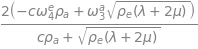

Итоговые корректировочные формулы на контакте имеют вид:
для акустической среды:


⎡                  ω_1__a                  ⎤
⎢                                          ⎥
⎢           2⋅(ω_3__a + ω_4__e)            ⎥
⎢         ───────────────────────          ⎥
⎢                  ______________          ⎥
⎢         c⋅ρₐ + ╲╱ ρₑ⋅(λ + 2⋅μ)           ⎥
⎢                                          ⎥
⎢  ⎛                        ______________⎞⎥
⎢2⋅⎝-c⋅ω_4__e⋅ρₐ + ω_3__a⋅╲╱ ρₑ⋅(λ + 2⋅μ) ⎠⎥
⎢──────────────────────────────────────────⎥
⎢                  ______________          ⎥
⎣         c⋅ρₐ + ╲╱ ρₑ⋅(λ + 2⋅μ)           ⎦

для упругой среды:


⎡                                        2⋅ω_2__e                             
⎢                                        ────────                             
⎢                                          ______                             
⎢                                        ╲╱ μ⋅ρₑ                              
⎢                                                                             
⎢                              ______________                                 
⎢                          2⋅╲╱ ρₑ⋅(λ + 2⋅μ) ⋅(ω_3__a + ω_4__e)               
⎢                         ─────────────────────────────────────               
⎢                                ______________                               
⎢                         c⋅ρₐ⋅╲╱ ρₑ⋅(λ + 2⋅μ)  + λ⋅ρₑ + 2⋅μ⋅ρₑ               
⎢                                                                             
⎢    ⎛                       ______________⎞                    ⎛         ____
⎢2⋅λ⋅⎝c⋅ω_4__e⋅ρₐ - ω_3__a⋅╲╱ ρₑ⋅(λ + 2⋅μ) ⎠ + ω_1__

In [18]:
# Пусть в акустической среде на контактной границе задано давление P, тогда
w_a_1, w_a_2, w_a_3 = symbols("omega^a_1 omega^a_2 omega^a_3")
w_a = Matrix([w_a_1, w_a_2, w_a_3])
v_a_x, v_a_y, p_a, P = symbols("v^a_x v^a_y p_a P")
print("Действие оператора Omega_y_a^(-1) на вектор [w_a_1, w_a_2, w_a_3] имеет вид: ")
display(simplify(Omega_y_a_inv * w_a))
print("На контактной границе неизвестно значение инварианта w_a_3, т.к. он выходит за границу области.")
print("Но можно найти связь между w_a_2 и w_a_3, задав физическое условие p_a^(n+1) == P.")
print("Оно имеет вид w_2 ==")
sol_a = solve((Omega_y_a_inv * w_a)[2] - P, w_a_2)
display(sol_a[0])
print("Тогда итоговые формулы для акустики на контакте примут вид:")
ac = simplify((Omega_y_a_inv * w_a).subs(w_a_2, sol_a[0]))
display(ac)

# Пусть в упругой среде на контактной границе задано Sxx = -P и Sxy = 0, тогда
w_e_1, w_e_2, w_e_3, w_e_4, w_e_5 = symbols("omega^e_1 omega^e_2 omega^e_3 omega^e_4 omega^e_5")
w_e = Matrix([w_e_1, w_e_2, w_e_3, w_e_4, w_e_5])
vx_e, vy_e, sxx_e, syy_e, sxy_e = symbols("v^e_x v^e_y s^e_xx s^e_yy s^e_xy")
print("\nДействие оператора Omega_x_e^(-1) на вектор [w_e_1, w_e_2, w_e_3, w_e_4, w_e_5] имеет вид: ")
display(Omega_y_e_inv * w_e)
print("На контактной границе неизвестно значение инвариантов w_e_3 и w_e_5, т.к. они выходят за границу области.")
print("Но можно найти связь между (w_e_3, w_e_2) и (w_e_5, w_e_4), задав физические условия "
     "Syy_e^(n+1) == -P и Sxy_e^(n+1) == 0.")
sol_e = solve([(Omega_y_e_inv * w_e)[3] + P, (Omega_y_e_inv * w_e)[4]], [w_e_5, w_e_3])
display(sol_e)
print("Тогда итоговые формулы для упругости на контакте примут вид:")
el = simplify(together((Omega_y_e_inv * w_e).subs(sol_e)))
display(el)

print("\nОсталось найти конкретное значение P из условия Vy_e^(n+1) == Vy_a^(n+1)")
p_search = solve(el[1] - ac[1], P)
display(p_search[0])
print("Итоговые корректировочные формулы на контакте имеют вид:")
print("для акустической среды:")
display(simplify(ac.subs(P, p_search[0])))
print("для упругой среды:")
display(simplify(el.subs(P, p_search[0])))

#### Корректировочные формулы на верхней границе акустической среды

In [19]:
print("Действие оператора Omega_y_a^(-1) на вектор [w_a_1, w_a_2, w_a_3] имеет вид: ")
display(simplify(Omega_y_a_inv * w_a))
print("На верхней границе неизвестно значение инварианта w_a_3, т.к. он выходит за границу области.")
print("Но можно найти связь между w_a_2 и w_a_3, задав физическое условие p_a^(n+1) == 0.")
print("Оно имеет вид w_a_3 ==")
sol_a = solve((Omega_y_a_inv * w_a)[2], w_a_3)
display(sol_a[0])
print("Тогда итоговые формулы на верхней границе примут вид:")
display(simplify((Omega_y_a_inv * w_a).subs(w_a_3, sol_a[0])))

Действие оператора Omega_y_a^(-1) на вектор [w_a_1, w_a_2, w_a_3] имеет вид: 


⎡     ω_1__a     ⎤
⎢                ⎥
⎢-ω_2__a + ω_3__a⎥
⎢────────────────⎥
⎢      c⋅ρₐ      ⎥
⎢                ⎥
⎣ω_2__a + ω_3__a ⎦

На верхней границе неизвестно значение инварианта w_a_3, т.к. он выходит за границу области.
Но можно найти связь между w_a_2 и w_a_3, задав физическое условие p_a^(n+1) == 0.
Оно имеет вид w_a_3 ==


Тогда итоговые формулы на верхней границе примут вид:


⎡  ω_1__a  ⎤
⎢          ⎥
⎢-2⋅ω_2__a ⎥
⎢──────────⎥
⎢   c⋅ρₐ   ⎥
⎢          ⎥
⎣    0     ⎦

#### Функции для корректировок на контакте и на границе

In [20]:
# край
def edge(w_a):
    w_a_1, w_a_2, w_a_3 = w_a
    vx = w_a_1
    vy = - 2 * w_a_2 / (c * rho_a)
    p = 0
    return (vx, vy, p)

# контакт
def border(w_a, w_e, s):
    w_a_1, w_a_2, w_a_3 = w_a
    w_e_1, w_e_2, w_e_3, w_e_4, w_e_5 = w_e
    
    if s == 'a':
        vx = w_a_1
        vy = 2 * (w_a_3 + w_e_4) / (c * rho_a + np.sqrt(rho_e * (lam + 2 * mu)))
        p = 2 * (-c * w_e_4 * rho_a + w_a_3 * np.sqrt(rho_e * (lam + 2 * mu))) / (c * rho_a + np.sqrt(rho_e * (lam + 2 * mu)))
        return (vx, vy, p)

    if s == 'e':
        vx = 2 * w_e_2 / np.sqrt(mu * rho_e)
        vy = 2 * np.sqrt(rho_e * (lam + 2 * mu)) * (w_a_3 + w_e_4) / (c * rho_a * sqrt(rho_e * (lam + 2 * mu)) + lam * rho_e + 2 * mu * rho_e)
        sxx = (2 * lam * (c * w_e_4 * rho_a - w_a_3 * np.sqrt(rho_e * (lam + 2 * mu))) + w_e_1 * (lam + 2 * mu)\
               * (c * rho_a + np.sqrt(rho_e * (lam + 2 * mu))))/((lam + 2 * mu)*(c * rho_a + np.sqrt(rho_e * (lam + 2 * mu))))
        syy = 2 * (c * w_e_4 * rho_a - w_a_3 * np.sqrt(rho_e * (lam + 2 * mu))) / (c * rho_a + np.sqrt(rho_e * (lam + 2 * mu)))
        sxy = 0
        return (vx, vy, sxx, syy, sxy)

#### Функция источника

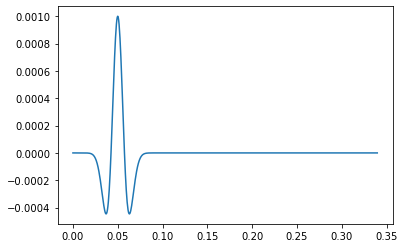

In [47]:
dt = 0.001
data = pd.ExcelFile('f(t).xlsx').parse()
data['t'] += abs(data['t'].min())

fig, ax = plt.subplots(1, 1)
ax.plot(data['t'][:680], data['f'][:680] * dt, '-')
plt.show()

def number(t):
    if t > data['t'][680]:
        return -1
    for i in range(680):
        if t >= data['t'][i] and t <= data['t'][i + 1]:
            return i

def source(k):
    t = k * dt
    if t == 0:
        return data['f'][0] * dt
    if t > data['t'][680]:
        return 0
    else:
        p = number(t)
        if p == -1:
            return 0
        x1, y1, x2, y2 = data['t'][p], data['f'][p], data['t'][p + 1], data['f'][p + 1]
        # y1 = k * x1 + b
        # y2 = k * x2 + b
        k = (y1 - y2) / (x1 - x2)
        b = y1 - k * x1
        f = k * t + b
        return f * dt

#### Расчёт

In [48]:
rho_a = 1000 # плотность в кг/м^3
c = 1500 # скорость волны в м/с
rho_e = 2500 # плотность в кг/м^3
Cp = 3000
Cs = 1500
# c1 = Cp, c2 = Cs
mu = Cs ** 2 * rho_e
lam = Cp ** 2 * rho_e - 2 * mu # = (sqr(c1) - 2 * sqr(c2)) * rho
T = 350 * dt / 2 + 0.05
nx, ny_a, ny_e = int(200), int(100 / 4), int(100 * 3 / 4)
hx, hy_a, hy_e = 5, 5, 5 # шаг по координате, h
f = 1.0 # Частота
z = 4 / 5 * ny_a
x0, y0 = nx / 2, z # точка нахождения источника
# В каждом узле мы храним значение давления и скорости среды для акустики
data_current_a = np.zeros((ny_a, nx), dtype = [('vx', np.float64), ('vy', np.float64), ('p', np.float64)])
data_next_a = np.zeros((ny_a, nx), dtype = [('vx', np.float64), ('vy', np.float64), ('p', np.float64)])
# В каждом узле мы храним значения для упругости
data_current_e = np.zeros((ny_e, nx), dtype = [('vx', np.float64),
                                               ('vy', np.float64),
                                               ('sxx', np.float64),
                                               ('syy', np.float64),
                                               ('sxy', np.float64)])
data_next_e = np.zeros((ny_e, nx), dtype = [('vx', np.float64),
                                            ('vy', np.float64),
                                            ('sxx', np.float64),
                                            ('syy', np.float64),
                                            ('sxy', np.float64)])

# Расчёт
for k in range(int(T / dt)):
    # Шаг по X
    for j in range(ny_a):
        for i in range(1, nx - 1):
            w1, w2, w3 = Ac_Omega_x(data_current_a[j, i])
            w1p, w2p, w3p = Ac_Omega_x(data_current_a[j, i - 1])
            w1n, w2n, w3n = Ac_Omega_x(data_current_a[j, i + 1])
            # Решаем уравнения переноса на инварианты
            w1_a_new = w1
            w2_a_new = w2 + c * dt / hx * (w2n - w2)
            w3_a_new = w3 - c * dt / hx * (w3 - w3p)
            data_next_a[j, i]['vx'], data_next_a[j, i]['vy'], data_next_a[j, i]['p'] = Ac_Omega_x_inv([w1_a_new, w2_a_new, w3_a_new])
    
    for j in range(ny_e):
        for i in range(1, nx - 1):
            w1, w2, w3, w4, w5 = El_Omega_x(data_current_e[j, i])
            w1p, w2p, w3p, w4p, w5p = El_Omega_x(data_current_e[j, i - 1])
            w1n, w2n, w3n, w4n, w5n = El_Omega_x(data_current_e[j, i + 1])
            # Решаем уравнения переноса на инварианты
            w1_e_new = w1
            w2_e_new = w2 + Cs * dt / hx * (w2n - w2)
            w3_e_new = w3 - Cs * dt / hx * (w3 - w3p)
            w4_e_new = w4 + Cp * dt / hx * (w4n - w4)
            w5_e_new = w5 - Cp * dt / hx * (w5 - w5p)
            data_next_e[j, i]['vx'], data_next_e[j, i]['vy'], data_next_e[j, i]['sxx'], data_next_e[j, i]['syy'], data_next_e[j, i]['sxy'] =\
            El_Omega_x_inv([w1_e_new, w2_e_new, w3_e_new, w4_e_new, w5_e_new])

    # Шаг по Y
    for i in range(1, nx - 1):
        for j in range(1, ny_a - 1):
            w1, w2, w3 = Ac_Omega_y(data_next_a[j, i])
            w1p, w2p, w3p = Ac_Omega_y(data_next_a[j - 1, i])
            w1n, w2n, w3n = Ac_Omega_y(data_next_a[j + 1, i])
            # Решаем уравнения переноса на инварианты
            w1_a_new = w1
            w2_a_new = w2 + c * dt / hy_a * (w2n - w2)
            w3_a_new = w3 - c * dt / hy_a * (w3 - w3p)
            data_current_a[j, i]['vx'], data_current_a[j, i]['vy'], data_current_a[j, i]['p'] = Ac_Omega_y_inv([w1_a_new, w2_a_new, w3_a_new])
    
        for j in range(1, ny_e - 1):
            w1, w2, w3, w4, w5 = El_Omega_y(data_next_e[j, i])
            w1p, w2p, w3p, w4p, w5p = El_Omega_y(data_next_e[j - 1, i])
            w1n, w2n, w3n, w4n, w5n = El_Omega_y(data_next_e[j + 1, i])
            # Решаем уравнения переноса на инварианты
            w1_e_new = w1
            w2_e_new = w2 + Cs * dt / hy_e * (w2n - w2)
            w3_e_new = w3 - Cs * dt / hy_e * (w3 - w3p)
            w4_e_new = w4 + Cp * dt / hy_e * (w4n - w4)
            w5_e_new = w5 - Cp * dt / hy_e * (w5 - w5p)
            data_current_e[j, i]['vx'], data_current_e[j, i]['vy'], data_current_e[j, i]['sxx'], data_current_e[j, i]['syy'], data_current_e[j, i]['sxy'] =\
            El_Omega_y_inv([w1_e_new, w2_e_new, w3_e_new, w4_e_new, w5_e_new])
    
    # Источник в точке (x0, y0)
    for i in range(1, nx - 1):
        for j in range(1, ny_a - 1):
            if abs(i - x0) < 1 and abs(j - y0) < 1:
                data_current_a[j, i]['p'] += source(k)
    
    # Решаем контактную задачу на границе
    for i in range(1, nx - 1):
        w1, w2, w3 = Ac_Omega_y(data_current_a[ny_a - 1, i])
        w1p, w2p, w3p = Ac_Omega_y(data_current_a[ny_a - 2, i])
        # Решаем уравнения переноса на инварианты
        w1_a_new = w1
        w3_a_new = w3 - c * dt / hx * (w3 - w3p)
        
        w1, w2, w3, w4, w5 = El_Omega_y(data_current_e[0, i])
        w1n, w2n, w3n, w4n, w5n = El_Omega_y(data_current_e[1, i])
        # Решаем уравнения переноса на инварианты
        w1_e_new = w1
        w2_e_new = w2 + Cs * dt / hx * (w2n - w2)
        w4_e_new = w4 + Cp * dt / hx * (w4n - w4)
        
        w_a = [w1_a_new, _, w3_a_new]
        w_e = [w1_e_new, w2_e_new, _, w4_e_new, _]
        data_current_a[ny_a - 1, i]['vx'], data_current_a[ny_a - 1, i]['vy'], data_current_a[ny_a - 1, i]['p'] = border(w_a, w_e, 'a')
        data_current_e[0, i]['vx'], data_current_e[0, i]['vy'], data_current_e[0, i]['sxx'],\
        data_current_e[0, i]['syy'], data_current_e[0, i]['sxy'] = border(w_a, w_e, 'e')
    
    # верхняя граница акустики
    for i in range(1, nx - 1):
        w1, w2, w3 = Ac_Omega_y(data_current_a[0, i])
        w1n, w2n, w3n = Ac_Omega_y(data_current_a[1, i])
        # Решаем уравнения переноса на инварианты
        w1_a_new = w1
        w2_a_new = w2 + c * dt / hx * (w2n - w2)
        w_a = [w1_a_new, w2_a_new, _]
        data_current_a[0, i]['vx'], data_current_a[0, i]['vy'], data_current_a[0, i]['p'] = edge(w_a)

#### Визуализация

In [ ]:
v = np.zeros((ny_a + ny_e, nx), dtype = 'float')
for i in range(nx):
    for j in range(ny_a + ny_e):
        if j < ny_a:
            v[j, i] = np.sqrt(data_current_a[j, i]['vx'] ** 2 + data_current_a[j, i]['vy'] ** 2)
        else:
            v[j, i] = np.sqrt(data_current_e[j - ny_a, i]['vx'] ** 2 + data_current_e[j - ny_a, i]['vy'] ** 2)

v *= -1
fig, ax = plt.subplots(1, 1)
ax.set_title('|v|')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
ax.set_ylim(ny_a + ny_e, 0)
img = ax.imshow(v, vmin = v.min(), vmax = v.max(), origin = 'upper', cmap = 'RdYlBu')
#_ = fig.colorbar(img)

#### Итог:
Теоретически, ожидаемый результат должен был получиться при соотношении расчётного времени и шага по времени, равном 350. Но на деле такой результат наблюдается при расчётном времени, в 2 раза меньшем предполагаемого.  
Ожидаемый результат и полученный (распределение модуля скорости):
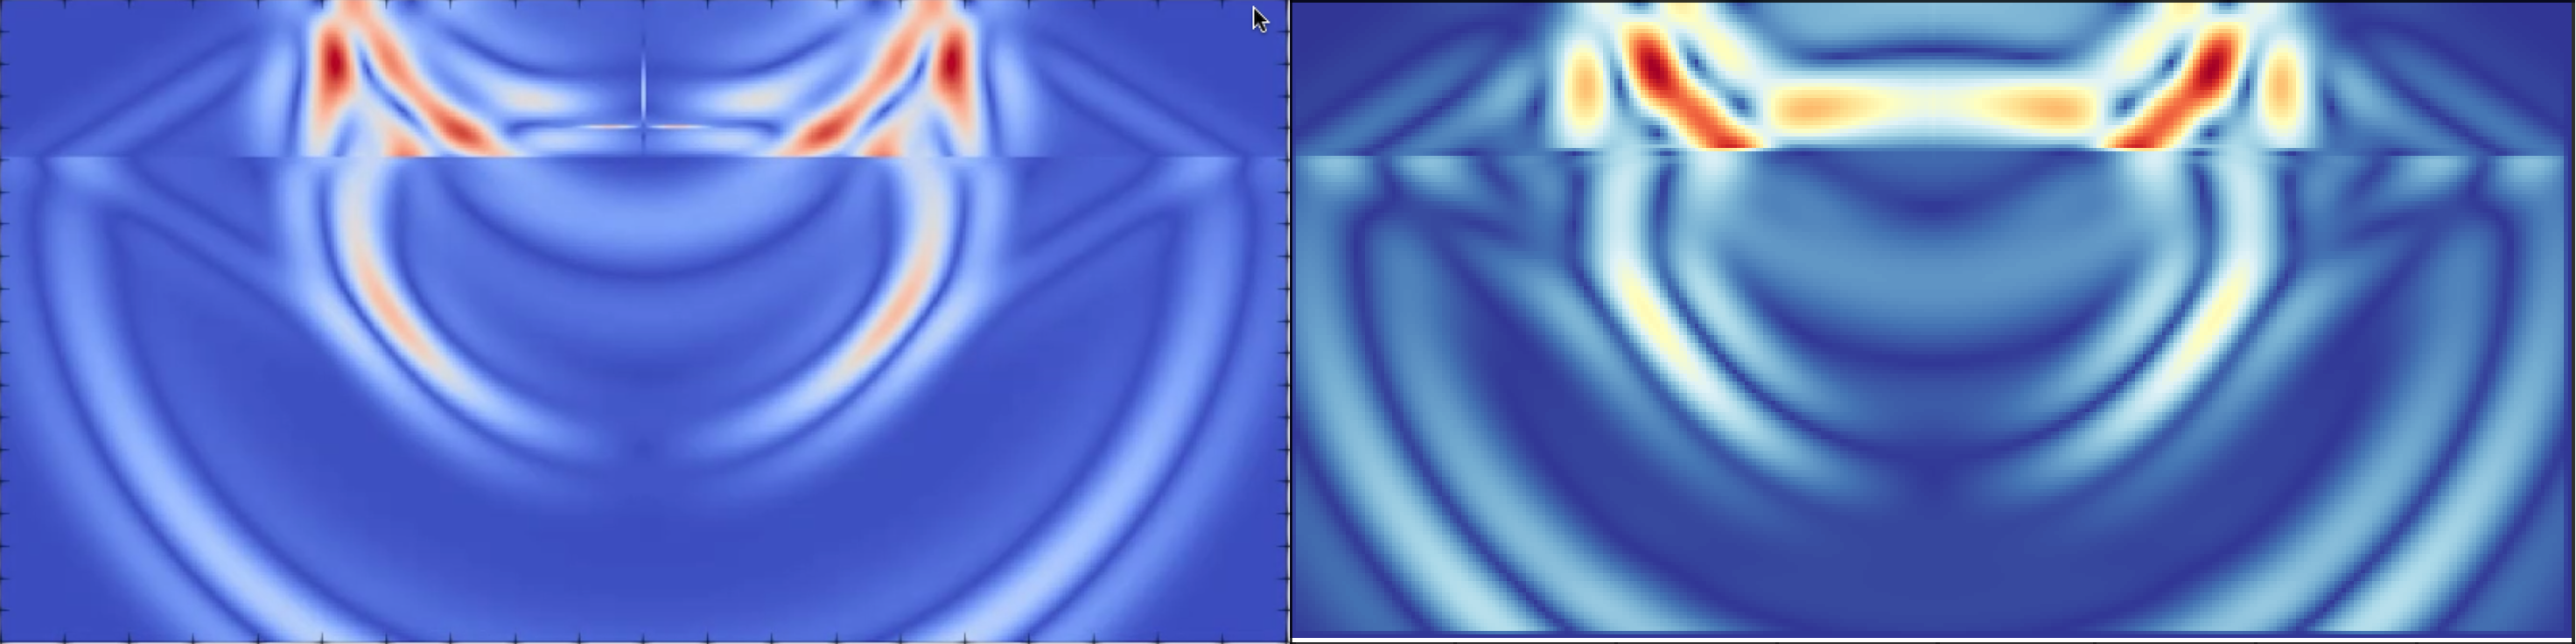